# <div style = 'background-color:orange'> <center>Data Science en el Sector Bancario: Préstamos Personales</div>
---


#### Análisis de clasificación aplicado a un conjunto de datos del banco Thera Bank, cuyo objetivo es identificar estrategias para convertir clientes pasivos en solicitantes de préstamos personales, aumentar la retención y fortalecer la relación financiera con la entidad. El propósito del estudio es utilizar técnicas de análisis de datos y aprendizaje automático para comprender mejor el perfil de los clientes y predecir la probabilidad de aceptación de un préstamo personal, aportando información útil para la toma de decisiones comerciales.
#### Como punto de partida, se dispone de la siguiente base de datos que reúne la siguiente información y campos sobre los clientes del banco:

⌧ID: customer Id

⌧Age:customer's age in completed years

⌧Experience:years of professional experience

⌧Income<:Annual income of the customer

⌧ZIP Code:Address Zip code

⌧Family:family size of customer

⌧CCAvg:Avg. spending on credit card per month
due to all other parameter is annually so i converted it for per year

⌧Education :Educational level ( undergraduate= 1 , graduate=2 , advance=3)

⌧Education :Educational level ( undergraduate= 1 , graduate=2 , advance=3)

⌧Personal Loan: Did this customer accept the personal loan offered in the last campaign?

⌧Securities Account:Does the customer have a securities account with the bank?

⌧CD Account:Does the customer have a certificate of deposit(CD) account with the bank?

⌧Online:Does the customer use internet banking facilities

⌧CreditCard: Does the customer use a credit card issued by universalBank?

## <div style = 'background-color:Orangered'> <center><font color='white'>① Analisis exploratorio de los datos (EDA) </font></div>
Para comenzar, se examina la estructura del dataset y se describen las variables disponibles.  
En esta etapa se busca:
- Conocer la cantidad de registros y variables.  
- Identificar valores nulos o duplicados.  
- Revisar tipos de datos.  
- Obtener estadísticas descriptivas básicas.  
- Visualizar relaciones entre las variables mediante gráficos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Bank_Personal_Loan.csv') # Carga de la base de datos
df.head(7)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0/40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1/50,2,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


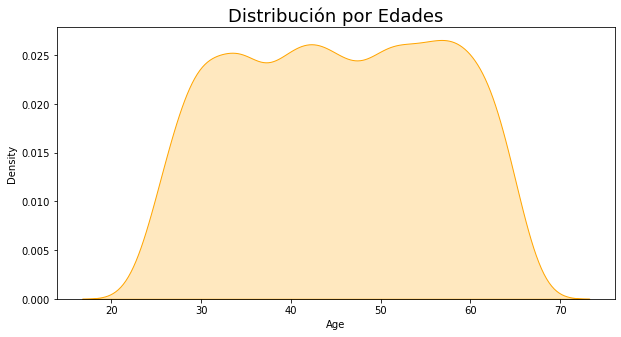

In [4]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Age'], color='Orange', fill=True)
plt.title('Distribución por Edades', fontsize=18)
plt.grid(False)
plt.show()

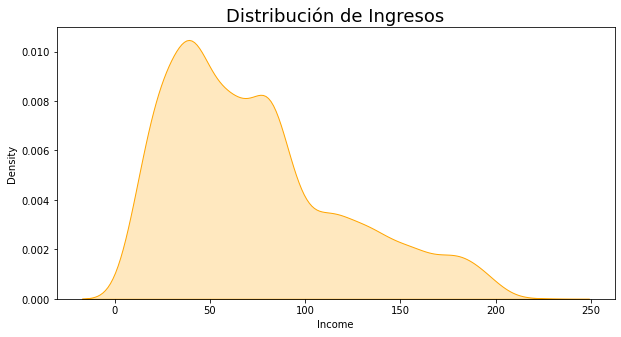

In [5]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Income'], color='Orange', fill=True)
plt.title('Distribución de Ingresos', fontsize=18)
plt.grid(False)
plt.show()

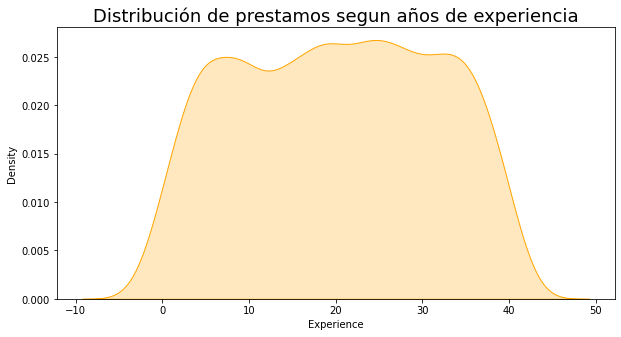

In [6]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Experience'], color='Orange', fill=True)
plt.title('Distribución de prestamos segun años de experiencia', fontsize=18)
plt.grid(False)
plt.show()

In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


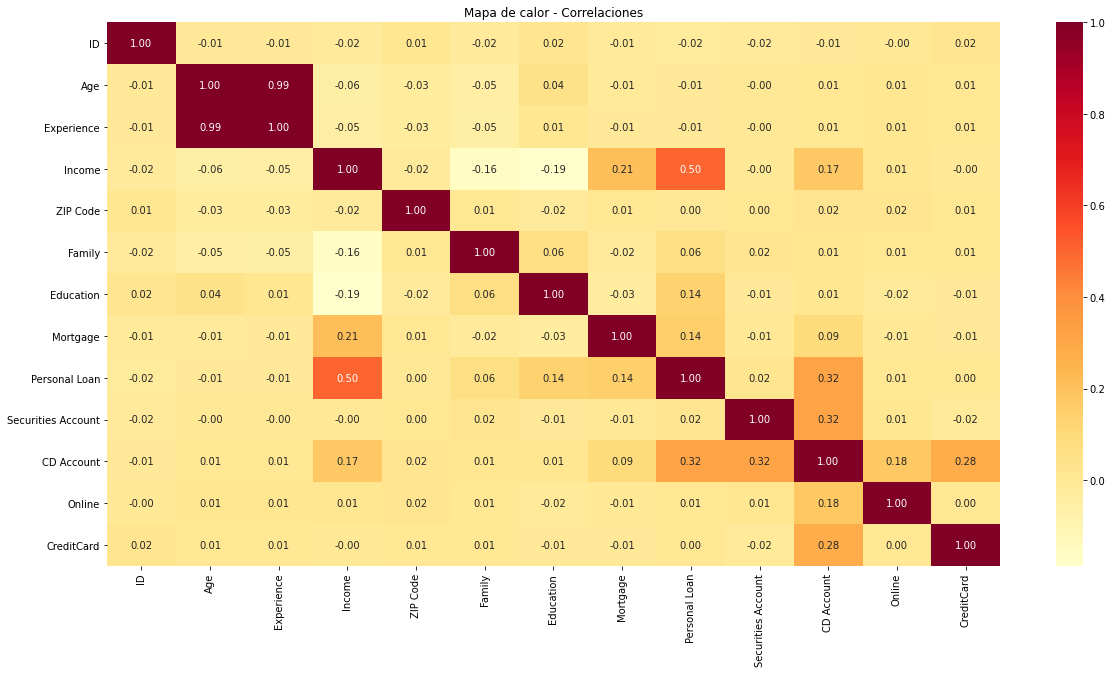

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlOrRd')
plt.title('Mapa de calor - Correlaciones')
plt.show()

In [10]:
sns.set() # Pedido a Seaborn para que grafique con la configuración por defecto.

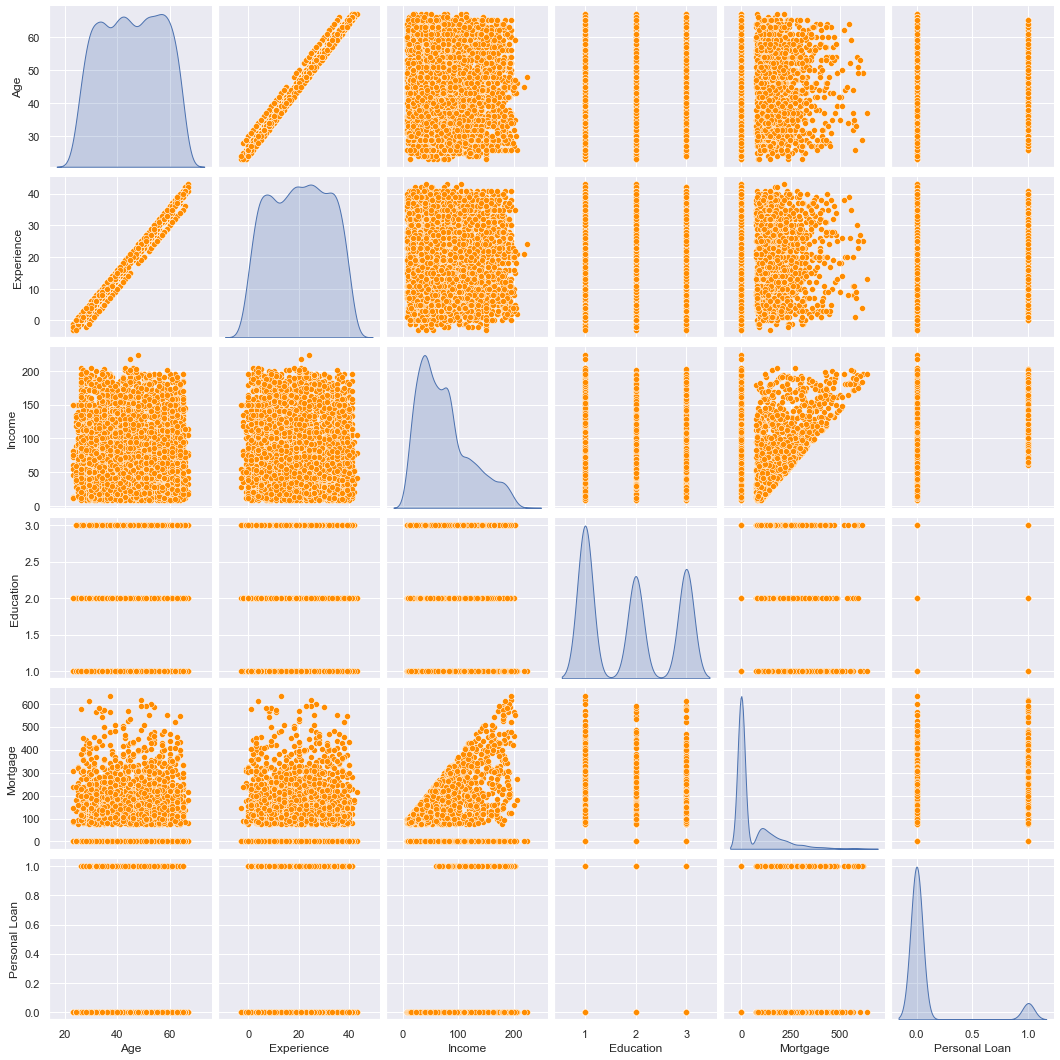

In [11]:
cols = ["Age", "Experience", "Income", "Education", "Mortgage", "Personal Loan"]

sns.pairplot(df[cols], height=2.5, diag_kind='kde', plot_kws={'color': 'darkorange'})
plt.show()

## <div style = 'background-color:Orangered'> <center><font color='white'>② Preparación y limpieza de los datos </font></div>
  
En esta etapa se realiza la preparación del conjunto de datos para el modelado.
El objetivo es garantizar que la información sea coherente, completa y utilizable por los algoritmos de aprendizaje automático.
Se incluyen tareas:
- Tratamiento de valores faltantes.
- Codificación de variables categóricas.
- Escalado o normalización de variables numéricas.    
De este modo, los datos quedarán listos para desarrollar modelos confiables y precisos.

In [12]:
# Elimino columna que no voy a utilizar en este análisis.
df = df.drop(columns=['ZIP Code'])
df = df.drop(columns=['CCAvg'])

In [13]:
# Esto es para ver si hay algun valor NAN en el dataframe, si sale TRUE quiere decir que si hay al menos un valor
# NAN y deberemos verificar como resolverlo tambien.
check_for_nan = df.isnull().values.any()
print (check_for_nan)

False


In [14]:
df.isnull().sum() # Chequeo de valores nulos.

ID                    0
Age                   0
Experience            0
Income                0
Family                0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## <div style = 'background-color:Orangered'> <center><font color='white'>③ Modelado y evaluación </font></div>
  
En esta sección se aplican distintos modelos de clasificación con el objetivo de predecir la probabilidad de que un cliente acepte un préstamo personal.

Modelos posibles:

- Árbol de decisión
- Random Forest
- K-Nearest Neighbors (KNN)

Se evalúan utilizando métricas como:

- Accuracy
- Precision
- Recall

## ❑ Arboles de Decision

In [15]:
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np

In [16]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
data = df
y = data["Personal Loan"]
X = data.drop(["Personal Loan"], axis=1)
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     test_size=0.33,
                                     random_state=42)

In [17]:
tree = DecisionTreeClassifier(max_depth=30, min_samples_leaf=5, random_state=11)

# Max depth acorta el arbol si no el resultado es muy extenso, en contraparte reduce la presición del modelo
# min_samples_leaf define el número mínimo de muestras usadas en una hoja (nodo final). Evita hojas con muy pocas muestras.
# max_leaf_nodes limita el número máximo de hojas (nodos finales), ayuda a controlar la complejidad del árbol.

In [18]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=5, random_state=11)

In [19]:
# Ver la precisión y poder compararla

print(f"La precisión del Arbol de decisión es de: {tree.score(X_test, y_test)}")

La precisión del Arbol de decisión es de: 0.9775757575757575


<div class="alert alert-warning">Este resultado me indica que este modelo es capas de predecir correctamente el 97.75% de las muestras del conjunto de prueba. Es un rendimiento razonable para seguir analizando puesto que es un modelado de datos de práctica. Aquí en este caso la presición del arbol de decisión es cercana al "1.0", lo que indica en principio que es un modelo muy preciso, pero no necesariamente esto puede indicar que este 100% correcto, puede darse el caso que este sobreajustado, razon por la cual decido por correr otro análisis con validación cruzada para descartar que este sucediendo esto..</div>

In [20]:
modelo = DecisionTreeClassifier(random_state=11)

from sklearn.model_selection import cross_val_score
puntuaciones = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')

print("Precisión en validación cruzada:", puntuaciones.mean())

Precisión en validación cruzada: 0.9666


A continuación el proceso de graficar el modelo de arbol de decisiones.

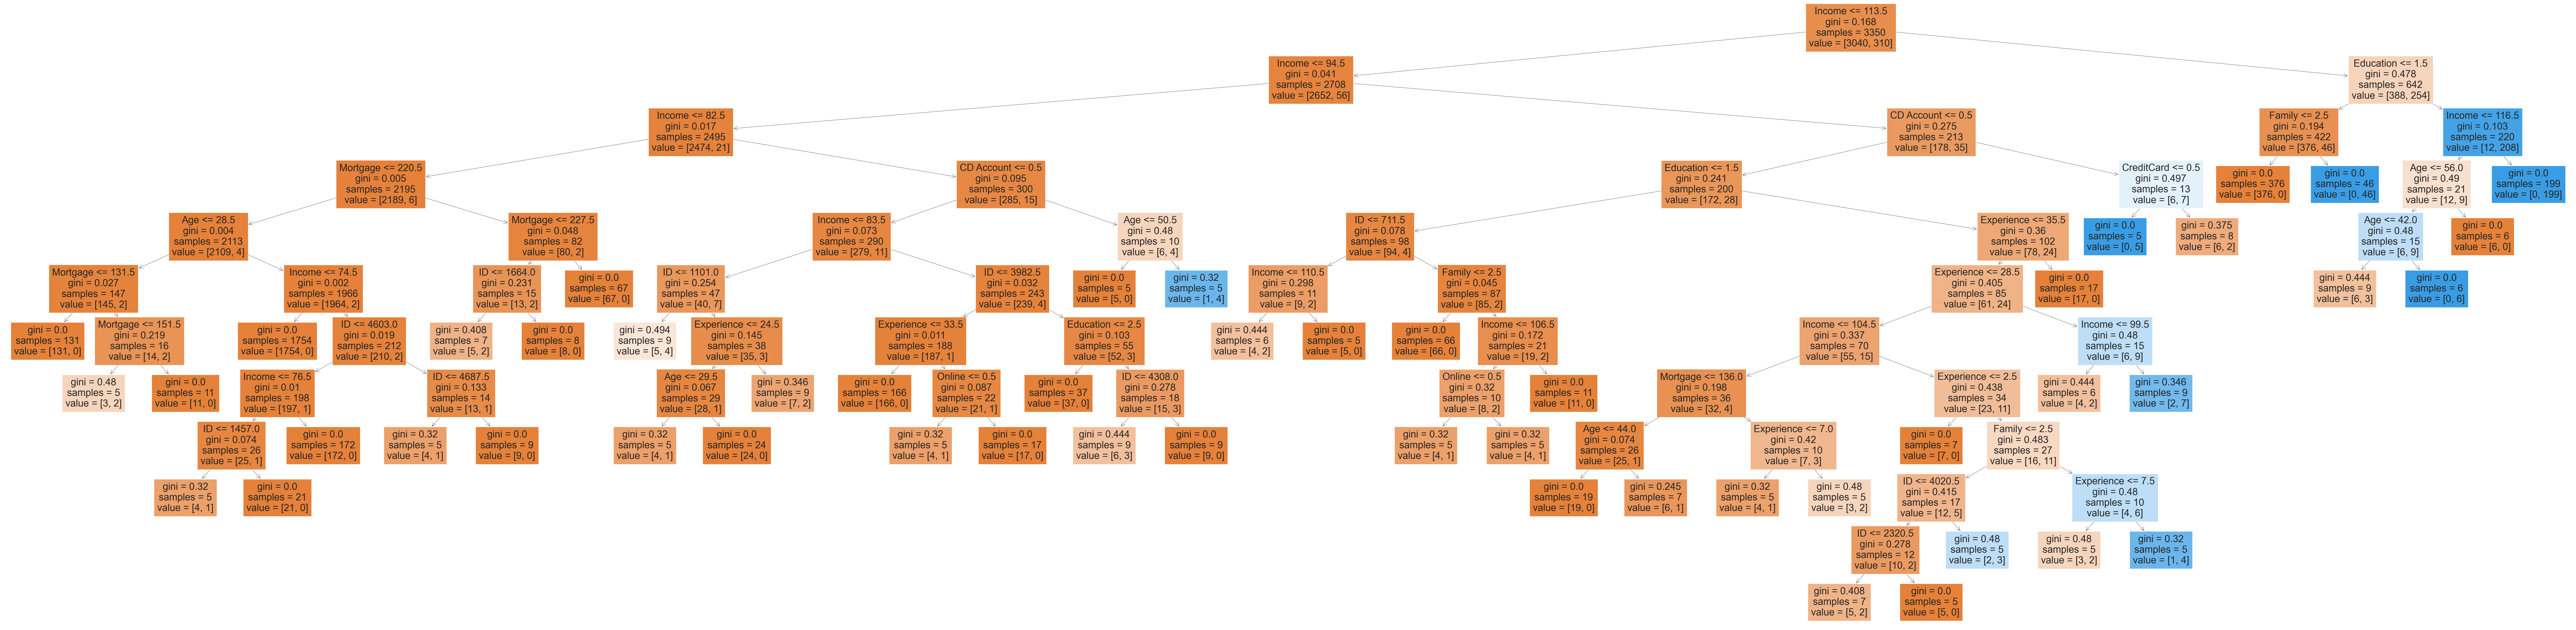

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Graficar el árbol
plt.figure(figsize=(200, 50))  # Tamaño de la figura

plot_tree(tree,filled=True, feature_names=X_train.columns)
plt.show()

<div class="alert alert-warning">Interpretando este modelo: La condicion principal es "Income", comenzando por la parte superior en el recuadro de origen, si el valor de ingresos (Income) es menor a 113,5 se sigue por la rama de color marron (a la izquierda del mismo), si se da el valor contrario será por la rama derecha. Luego la próxima rama tendra nuevamente la condición principal "Income", si se llega a cumplir seguirá por la rama en marrón de su izquierda.

En cada rama tenemos por ejemplo los datos "value=[2652,56]" y "samples=2708", para interpretar esto tenemos que dividir 2652/2708 para saber que la probabilidad de que salga en esta rama es de 97.93%

Otro dato importante es que cuanto más cercano a 0 sea el valor del coeficiente de Gini, mayor será la pureza en términos de clasificación de las muestras en esa hoja. Al contrario si tenemos un valor más alto o alejado de 0, indica una mezcla de diferentes clases en las muestras lo que hace que pierda pureza.</div>

Calculando predicciones para probar

In [22]:
# Identifico un valor exacto de los datos para tomar como muestra.
print(df.iloc[[999]].to_string(index=False))

  ID  Age  Experience  Income  Family  Education  Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard
1000   60          35      18       1          2         0              0                   0           0       1           1


In [23]:
# Para ejemplificar voy a definir la variable segun los valores de la fila 999 que es la que identifique en la sentencia anterior.
dato1 = 60, 35, 18, 1, 2, 0, 0, 0, 0, 0, 1
prediction = tree.predict_proba([dato1])
print (prediction)

[[1. 0.]]


<div class="alert alert-warning">"El resultado significa que: 
    
    -100% de probabilidad de pertenecer a la clase 0 (Sin préstamo)
    -0% de probabilidad de pertenecer a la clase 1 (Se le otorgaria un préstamo)
</div>

## ❑ Random Forest (Bosques Aleatorios)

In [24]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
data = df
y = data["Personal Loan"]
X = data.drop(["Personal Loan"], axis=1)
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     test_size=0.33,
                                     random_state=42)

Como se componen los datos:

El dataset se compone de 11 columnas. 10 corresponden a variables independientes, que usaremos para predecir el target y 1 (Personal Loan) es la variable a predecir. Por la exploración de datos, todas las variables son numéricas, ya sea enteras o reales y no tiene valores nulos.

In [25]:
model = RandomForestClassifier(random_state=10, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)
print(f"La precisión del Random Forest es: {model.score(X_test, y_test)}")

La precisión del Random Forest es: 0.983030303030303


In [26]:
classifier=model.fit(X_train, y_train) #Construimos el modelo sobre los datos de entrenamiento

In [27]:
predictions=classifier.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.13026778945578593


<div class="alert alert-warning">Cuanto menor sea el valor del MSE mejor será el rendimiento del modelo ya que indica que las predicciones están más cerca de los valores reales. Un resultado del MSE igual a cero indica que las predicciones son perfectas (en ese caso el modelo predijo exactamente todos los valores observados).
</div>

Matriz de confusión
[[1475    5]
 [  23  147]]
Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo
tanto los verdaderos positivos_ TP(d), como los verdaderos negativos_TN(a)
La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>
(c) son falsos negativos_FN, (b) seran los falsos positivos_FP



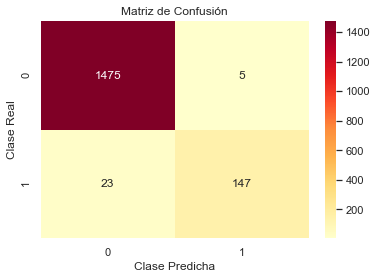


Métricas de clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1480
           1       0.97      0.86      0.91       170

    accuracy                           0.98      1650
   macro avg       0.98      0.93      0.95      1650
weighted avg       0.98      0.98      0.98      1650

0.983030303030303


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Matriz de confusión")
print(confusion_matrix(y_test,predictions))
print("Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo")
print("tanto los verdaderos positivos_ TP(d), como los verdaderos negativos_TN(a)")
print("La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>")
print("(c) son falsos negativos_FN, (b) seran los falsos positivos_FP")
print()
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')

# Agregar etiquetas y títulos
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')

# Mostrar el gráfico
plt.show()

print()
print("Métricas de clasificación")
print("-----------------------------------------------------")
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

<div class="alert alert-warning">La exactitud («accuracy«) representa el porcentaje de predicciones correctas frente al total. Es el cociente entre los casos bien clasificados por el modelo (verdaderos positivos [TP] y verdaderos negativos [TN], es decir, los valores en la diagonal principal de la matriz de confusión), y la suma de todos los casos. 
   
Cuando se da el caso de un conjunto de datos que es poco equilibrado, no es una métrica útil.
    
La sensibilidad («Recuperacion|Recall«) representa la habilidad del modelo de detectar los casos relevantes, es mas util
cuando los datos no son tan equilibrados. En otras palabras, representa la tasa de verdaderos positivos (True Positive Rate) ó [TP]. Es la proporción entre los casos positivos bien clasificados por el modelo, respecto al total de positivos. </div>

In [30]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': classifier.feature_importances_}
                            )
print()
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,Income,0.578725
5,Education,0.099052
4,Family,0.070587
8,CD Account,0.057985
0,ID,0.048937
6,Mortgage,0.046623
2,Experience,0.036940
1,Age,0.036025
9,Online,0.010300
10,CreditCard,0.009301


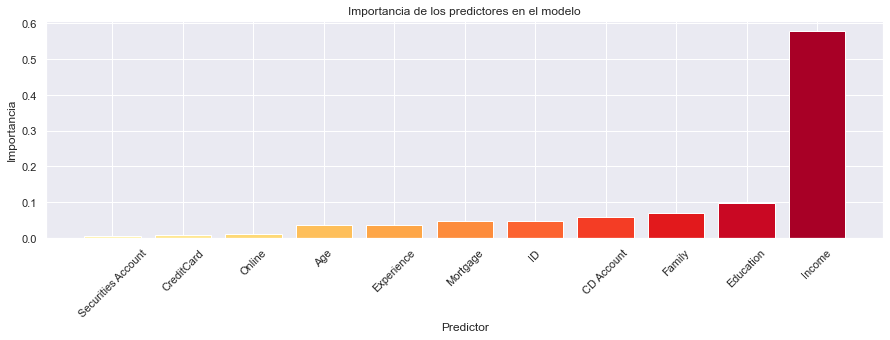

In [31]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(15, 4))

# Ordenar los predictores por importancia descendente
importancia_predictores = importancia_predictores.sort_values('importancia', ascending=True)

# Graficar la importancia de los predictores
colores = sns.color_palette("YlOrRd", n_colors=len(importancia_predictores))

ax.bar(importancia_predictores['predictor'], importancia_predictores['importancia'], color = colores)

# Personalizar la apariencia del gráfico
ax.set_xlabel('Predictor')
ax.set_ylabel('Importancia')
ax.set_title('Importancia de los predictores en el modelo')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

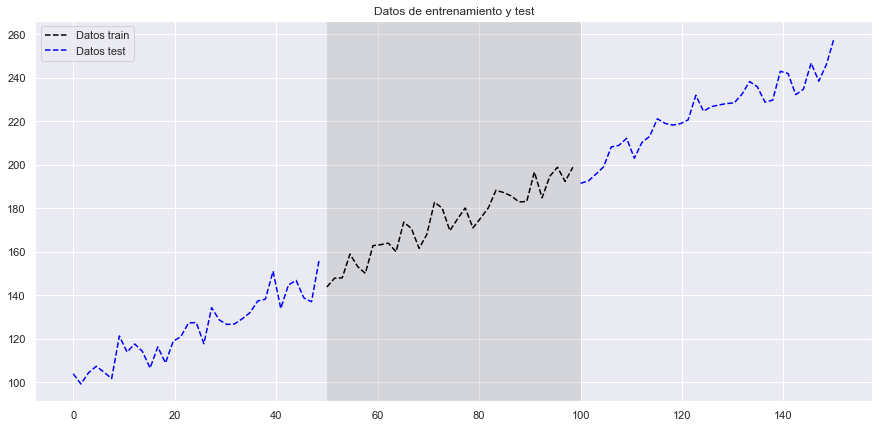

In [32]:
# Datos simulados
# ==============================================================================
X = np.linspace(0, 150, 100)
y = (X + 100) + np.random.normal(loc=0.0, scale=5.0, size=X.shape)
X_train = X[(X>=50) & (X<100)]
y_train = y[(X>=50) & (X<100)]
X_test_inf = X[X < 50]
y_test_inf = y[X < 50]
X_test_sup = X[X >= 100]
y_test_sup = y[X >= 100]

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(X_train, y_train, c='black', linestyle='dashed', label = "Datos train")
ax.axvspan(50, 100, color='gray', alpha=0.2, lw=0)
ax.plot(X_test_inf, y_test_inf, c='blue', linestyle='dashed', label = "Datos test")
ax.plot(X_test_sup, y_test_sup, c='blue', linestyle='dashed')
ax.set_title("Datos de entrenamiento y test")
plt.legend();

In [33]:
print (classifier.predict ([[60, 35, 18, 1, 2, 0, 0, 0, 0, 0, 1]]))

[0]


<div class="alert alert-warning">Resultado, [0] quiere decir que el modelo clasificó como "Sin préstamo" a la persona cuyos datos quise predecir en este algoritmo y en el anterior. Luego intento obtener la probabilidad de que la persona sea clasificada como "Sin préstamo" y se obtiene una serie de porcentajes los cuales representan: donde hay un valor de 99% de probabilidad de ser clasificado "Sin préstamo" y un 0,1% de probabilidad de ser clasificado para obtener un préstamo </div>

In [34]:
print (classifier.predict ([[60, 35, 2018, 1, 2, 0, 0, 0, 0, 0, 1]]))

[0]


In [35]:
print(classifier.predict_proba([[60, 35, 2018, 1, 2, 0, 0, 0, 0, 0, 1]]))

[[0.99 0.01]]


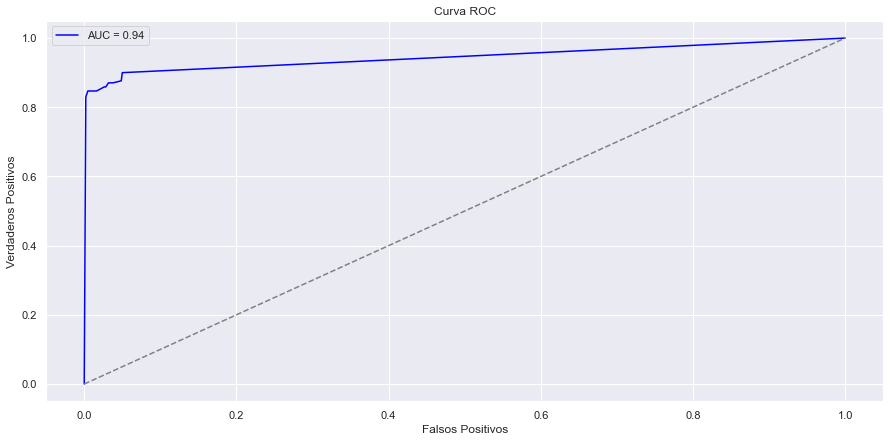

In [36]:
from sklearn.metrics import roc_curve, auc

y_prob = tree.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 7))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

<div class="alert alert-warning">Interpretación: Cuanto más cerca del valor "1" esté el AUC (Area Under the Curve ó Area Bajo la Curva), mejor sera el modelo.
    
- AUC = 1.0 → Clasificación perfecta
- AUC = 0.5 → Clasificación aleatoria
- AUC < 0.5 → Peor que aleatorio (invirtió las clases)

ROC (Receiver Operating Characteristic ó Característica Operativa del Receptor) es un gráfico que muestra la capacidad de un modelo de clasificación para distinguir entre clases. Representa la relación entre:

- Eje X: Tasa de Falsos Positivos (FPR) = FP / (FP + TN)
- Eje Y: Tasa de Verdaderos Positivos (TPR) = TP / (TP + FN)
En la curva ROC un modelo perfecto tiene una curva que sube rápidamente a TPR=1 sin apenas moverse en FPR como la de estos datos
en contrapartida un modelo aleatorio tiene una curva diagonal (y = x). </div>

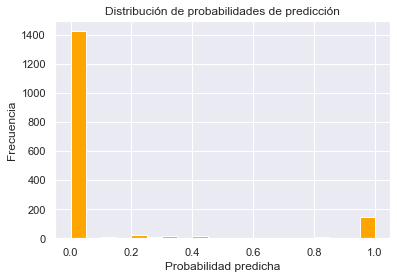

In [37]:
plt.hist(y_prob, bins=20, color="orange")
plt.xlabel("Probabilidad predicha")
plt.ylabel("Frecuencia")
plt.title("Distribución de probabilidades de predicción")
plt.show()

# Si hay muchas predicciones en el valor 0,5 el modelo seria incierto. 

## ❑ K-Nearest Neighbors (KNN)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [39]:
X = df[['Age', 'Experience', 'Income', 'Family', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online']]
y = df['CreditCard']

In [40]:
print("Forma de X:", X.shape)  # X debería tener la forma (n_muestras, n_features)
print("Forma de y:", y.shape)  # y debería tener la forma (n_muestras,)

Forma de X: (5000, 10)
Forma de y: (5000,)


In [41]:
# Divido los datos en datos de entrenamiento y los que se usaran para pruebas.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()

In [43]:
# Ajustar y transformar X_train, luego transformar X_test (sin ajustar)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
from sklearn.model_selection import train_test_split

# X e y deben tener el mismo número de muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma de X_train:", X_train.shape)  # Debería ser (80, n_features)
print("Forma de y_train:", y_train.shape)  # Debería ser (80,)

Forma de X_train: (4000, 10)
Forma de y_train: (4000,)


In [45]:
# Crear el clasificador KNN con k=3 (3 vecinos más cercanos)
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo KNN con los datos escalados
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
y_pred = knn.predict(X_test_scaled)

Accuracy: 0.669

Matriz de confusión:
 [[578 130]
 [201  91]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       708
           1       0.41      0.31      0.35       292

    accuracy                           0.67      1000
   macro avg       0.58      0.56      0.57      1000
weighted avg       0.65      0.67      0.65      1000



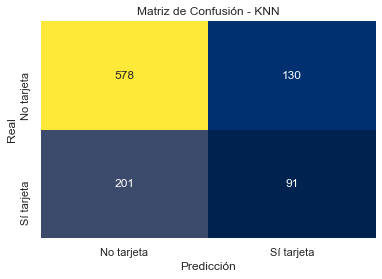

[[578 130]   → Verdaderos Negativos (TN) | Falsos Positivos (FP)
[[201  91]]  → Falsos Negativos (FN)   | Verdaderos Positivos (TP)


In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear gráfico tipo heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", cbar=False,
            xticklabels=["No tarjeta", "Sí tarjeta"],
            yticklabels=["No tarjeta", "Sí tarjeta"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN")
plt.show()

print("[[578 130]   → Verdaderos Negativos (TN) | Falsos Positivos (FP)")
print( "[[201  91]]  → Falsos Negativos (FN)   | Verdaderos Positivos (TP)")

<div class="alert alert-warning">Los valores de la diagonal principal [A] y [D] se corresponden con los valores estimados de forma correcta por el modelo tanto los verdaderos positivos TP(D), como los verdaderos negativos TN(A)
La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>
[C] son falsos negativos FN, [B] serán los falsos positivos FP.
</div>

<div class="alert alert-warning">Problemas identificados: Actualmente este modelo KNN tiene un rendimiento pobre con una certeza de solo 67%, osea que acierta solo el 67% y ademas se están perdiendo demasiados casos positivos (clientes que sí aceptarían tarjeta).

Alto número de Falsos Negativos (201) - Hay una falla en el modelo en identificar muchos casos positivos
    
Desequilibrio en las predicciones - Predice mejor la clase negativa (578 correctos) que la positiva (91 correctos)</div>

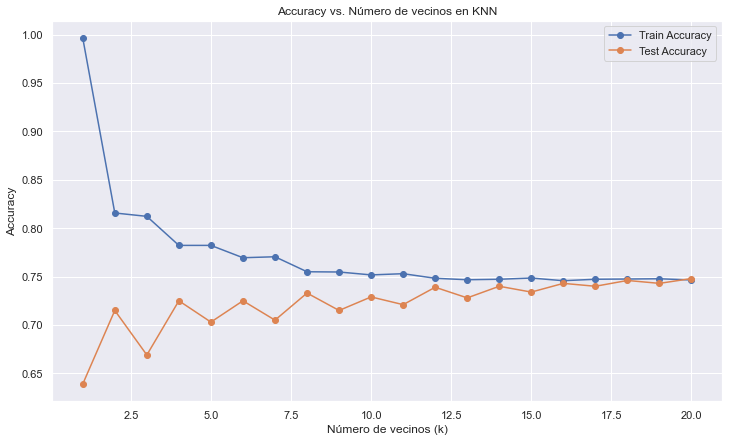

In [48]:
# Como 67% de aciertos es poco, corro este grafico para analizar cuál es el k óptimo 
# (que no sea muy bajo → sobreajuste, ni muy alto → subajuste).

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_range = range(1, 21)  # pruebo de 1 a 20 vecinos
train_acc = []
test_acc = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_acc.append(accuracy_score(y_train, knn.predict(X_train_scaled)))
    test_acc.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

# Graficar
plt.figure(figsize=(12,7))
plt.plot(k_range, train_acc, marker='o', label='Train Accuracy')
plt.plot(k_range, test_acc, marker='o', label='Test Accuracy')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Número de vecinos en KNN")
plt.legend()
plt.show()

In [49]:
# Visualmente en el grafico anterior puedo ver y probar que con un K=20 maximizaría la eficiencia en este modelo.

# Crear el clasificador KNN con k=20 (20 vecinos más cercanos)
knn = KNeighborsClassifier(n_neighbors=20)

# Entrenar el modelo KNN con los datos escalados
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=20)

In [50]:
y_pred = knn.predict(X_test_scaled)

Accuracy: 0.748

Matriz de confusión:
 [[697  11]
 [241  51]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.74      0.98      0.85       708
           1       0.82      0.17      0.29       292

    accuracy                           0.75      1000
   macro avg       0.78      0.58      0.57      1000
weighted avg       0.77      0.75      0.68      1000



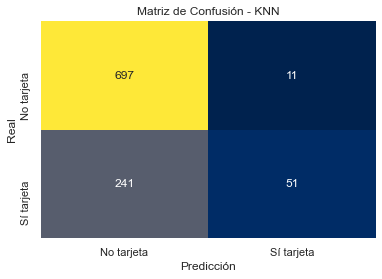

[[578 130]   → Verdaderos Negativos (TN) | Falsos Positivos (FP)
[[201  91]]  → Falsos Negativos (FN)   | Verdaderos Positivos (TP)


In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear gráfico tipo heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", cbar=False,
            xticklabels=["No tarjeta", "Sí tarjeta"],
            yticklabels=["No tarjeta", "Sí tarjeta"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN")
plt.show()

print("[[578 130]   → Verdaderos Negativos (TN) | Falsos Positivos (FP)")
print( "[[201  91]]  → Falsos Negativos (FN)   | Verdaderos Positivos (TP)")

<div class="alert alert-warning">Como resultado el nuevo estudio otorga una mejor precisión pero tiene poco "Recall" (detecta pocos clientes reales), el modelo estaría desbalanceado. Por ello procedo a intentar balancear el mismo con algunos cambios en la cantidad de K y pesos relativos para ver si es posible utilizar este algoritmo para predecir resultados.
</div>

In [52]:
# Crear el clasificador KNN con k=18 (18 vecinos más cercanos) y cambio la metrica donde vecinos mas cercanos pesan mas
# (ayuda a detectar mejor la clase minoritaria)
knn = KNeighborsClassifier(n_neighbors=18, weights='distance')

# Entrenar el modelo KNN con los datos escalados
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=18, weights='distance')

In [53]:
y_pred = knn.predict(X_test_scaled)

Accuracy: 0.718

Matriz de confusión:
 [[662  46]
 [236  56]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.74      0.94      0.82       708
           1       0.55      0.19      0.28       292

    accuracy                           0.72      1000
   macro avg       0.64      0.56      0.55      1000
weighted avg       0.68      0.72      0.67      1000



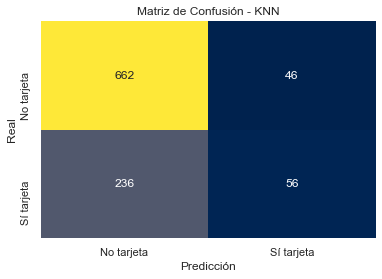

[[578 130]   → Verdaderos Negativos (TN) | Falsos Positivos (FP)
[[201  91]]  → Falsos Negativos (FN)   | Verdaderos Positivos (TP)

Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo
tanto los verdaderos positivos TP(d), como los verdaderos negativos TN(a)
La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>
(c) son falsos negativos FN, (b) seran los falsos positivos FP



In [54]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear gráfico tipo heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", cbar=False,
            xticklabels=["No tarjeta", "Sí tarjeta"],
            yticklabels=["No tarjeta", "Sí tarjeta"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN")
plt.show()

print("[[578 130]   → Verdaderos Negativos (TN) | Falsos Positivos (FP)")
print( "[[201  91]]  → Falsos Negativos (FN)   | Verdaderos Positivos (TP)")
print()
print("Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo")
print("tanto los verdaderos positivos TP(d), como los verdaderos negativos TN(a)")
print("La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>")
print("(c) son falsos negativos FN, (b) seran los falsos positivos FP")
print()

<div class="alert alert-warning">Luego de intentar ajustar el algoritmo y aplicar técnicas de balanceo de clases, el modelo continúa presentando dificultades para mejorar su desempeño en ciertas predicciones.
Esto indica que, a pesar de los intentos de equilibrar la distribución de las clases, podrían existir otras limitaciones en los datos o en el enfoque del modelo que afectan la capacidad predictiva.

El balanceo fue un paso necesario con los resultados previamente obtenidos, pero no garantiza por sí solo la mejora del modelo, y sería recomendable explorar otros enfoques para mejores resultados.
</div>

## <div style = 'background-color:Orangered'> <center><font color='white'>④ Conclusiones </font></div>
  
#### Entre los modelos evaluados —Árboles de decisión, Random Forest y KNN—, Random Forest se destacó por ofrecer la mejor precisión y un bajo ratio de errores, por lo que se recomienda utilizar este algoritmo para futuras predicciones, asegurando resultados confiables y consistentes para este conjunto de datos.

#### En cuanto a la importancia de los predictores, la variable “Income” (ingresos) resultó ser la más influyente, seguida a distancia por el nivel de educación del cliente.

#### Recomendaciones para la entidad bancaria: Centrar los esfuerzos de análisis en determinar con precisión el nivel de ingresos de los clientes, ya que es el factor más determinante para la aceptación de préstamos. Considerar también el nivel de educación como segundo factor relevante.

#### Aplicando este enfoque, será posible optimizar la asignación de créditos, reduciendo la probabilidad de errores como falsos negativos y mejorando la eficiencia en la toma de decisiones crediticias.

---
✍️ Autor: Néstor Díaz — Contador Público | Analista de Datos | Machine Learning

📅 Proyecto: Data Science en el Sector Bancario: Préstamos Personales

---